In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('cirrhosis.csv')

In [3]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,3,1012,D,D-penicillamine,25594,M,N,N,N,Y,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,Y,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,5,1504,C,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3


In [4]:
data.isnull().sum()

ID                0
N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      28
Albumin           0
Copper            2
Alk_Phos          0
SGOT              0
Tryglicerides    30
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             312 non-null    int64  
 1   N_Days         312 non-null    int64  
 2   Status         312 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            312 non-null    int64  
 5   Sex            312 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          312 non-null    object 
 10  Bilirubin      312 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        312 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      308 non-null    float64
 18  Prothrombi

<AxesSubplot:>

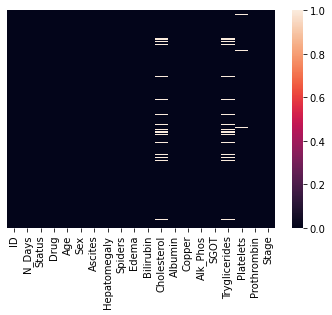

In [6]:
sns.heatmap(data.isnull(), yticklabels = False)

In [7]:
data.dropna(inplace = True)

<AxesSubplot:xlabel='Bilirubin', ylabel='Cholesterol'>

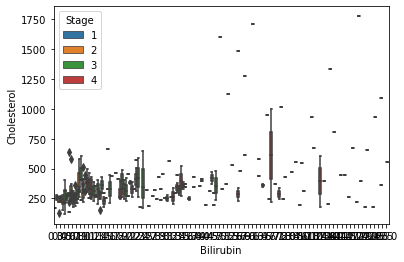

In [9]:
sns.boxplot(x = 'Bilirubin', y = 'Cholesterol', hue ='Stage',data = data, width = 2.0)

<AxesSubplot:xlabel='Status', ylabel='count'>

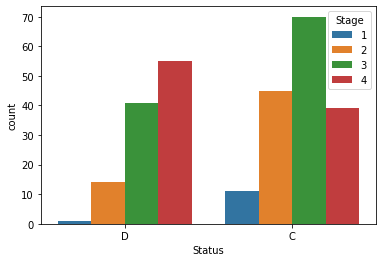

In [10]:
sns.countplot(x = 'Status', hue = 'Stage', data = data)

<AxesSubplot:xlabel='Drug', ylabel='count'>

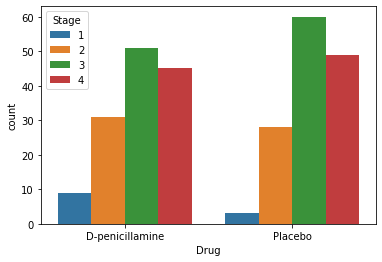

In [11]:
sns.countplot(x = 'Drug', hue = 'Stage', data = data)

In [12]:
data.drop(['ID','Age','N_Days'], inplace = True, axis = 1)

In [13]:
data.drop(['Status'], inplace = True, axis = 1)

In [14]:
sex = pd.get_dummies(data['Sex'], drop_first = 'True')
sex.head()

,M
0,0
1,0
2,1
3,0
4,0


In [15]:
Asc = pd.get_dummies(data['Ascites'], drop_first = 'True')
Asc.head()

,Y
0,1
1,0
2,0
3,0
4,0


In [16]:
Hep = pd.get_dummies(data['Hepatomegaly'], drop_first = 'True')
Hep.head()

,Y
0,1
1,1
2,0
3,1
4,1


In [17]:
Spider = pd.get_dummies(data['Spiders'], drop_first = 'True')
Spider.head()

,Y
0,1
1,1
2,0
3,1
4,1


In [18]:
Edema = pd.get_dummies(data['Edema'], drop_first = 'True')
Edema.head()

,Y
0,1
1,0
2,1
3,1
4,0


In [19]:
Drug = pd.get_dummies(data['Drug'], drop_first = 'True')
Drug.head()

,Placebo
0,0
1,0
2,0
3,0
4,1


In [20]:
data = pd.concat([data,sex,Asc,Hep,Spider,Edema,Drug], axis=1)
data.head()

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,...,Tryglicerides,Platelets,Prothrombin,Stage,M,Y,Y,Y,Y,Placebo
0,D-penicillamine,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,...,172.0,190.0,12.2,4,0,1,1,1,1,0
1,D-penicillamine,F,N,Y,Y,N,1.1,302.0,4.14,54.0,...,88.0,221.0,10.6,3,0,0,1,1,0,0
2,D-penicillamine,M,N,N,N,Y,1.4,176.0,3.48,210.0,...,55.0,151.0,12.0,4,1,0,0,0,1,0
3,D-penicillamine,F,N,Y,Y,Y,1.8,244.0,2.54,64.0,...,92.0,183.0,10.3,4,0,0,1,1,1,0
4,Placebo,F,N,Y,Y,N,3.4,279.0,3.53,143.0,...,72.0,136.0,10.9,3,0,0,1,1,0,1


In [21]:
data.drop(['Drug','Sex','Ascites','Hepatomegaly','Spiders','Edema'], inplace = True, axis = 1)

In [22]:
data.head()

,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,M,Y,Y,Y,Y,Placebo
0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4,0,1,1,1,1,0
1,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3,0,0,1,1,0,0
2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4,1,0,0,0,1,0
3,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4,0,0,1,1,1,0
4,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3,0,0,1,1,0,1


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Bilirubin      276 non-null    float64
 1   Cholesterol    276 non-null    float64
 2   Albumin        276 non-null    float64
 3   Copper         276 non-null    float64
 4   Alk_Phos       276 non-null    float64
 5   SGOT           276 non-null    float64
 6   Tryglicerides  276 non-null    float64
 7   Platelets      276 non-null    float64
 8   Prothrombin    276 non-null    float64
 9   Stage          276 non-null    int64  
 10  M              276 non-null    uint8  
 11  Y              276 non-null    uint8  
 12  Y              276 non-null    uint8  
 13  Y              276 non-null    uint8  
 14  Y              276 non-null    uint8  
 15  Placebo        276 non-null    uint8  
dtypes: float64(9), int64(1), uint8(6)
memory usage: 33.4 KB


In [24]:
data['Bilirubin'] = data['Bilirubin'].astype('int')
data['Cholesterol'] = data['Cholesterol'].astype('int')
data['Albumin'] = data['Albumin'].astype('int')
data['Copper'] = data['Copper'].astype('int')
data['Alk_Phos'] = data['Alk_Phos'].astype('int')
data['SGOT'] = data['SGOT'].astype('int')
data['Tryglicerides'] = data['Tryglicerides'].astype('int')
data['Platelets'] = data['Platelets'].astype('int')
data['Prothrombin'] = data['Prothrombin'].astype('int')

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
feature = data[['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos','SGOT','Tryglicerides', 'Platelets', 'Prothrombin',
       'M','Y','Y','Y','Y','Placebo']]
X = np.asarray(feature)
y = np.asarray(data['Stage'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X,y)
y_predict = clf.predict(X_test)

[Text(869.310661764706, 1829.423076923077, 'X[11] <= 0.5\ngini = 0.675\nsamples = 276\nvalue = [12, 59, 111, 94]'),
 Text(348.339705882353, 1683.0692307692307, 'X[18] <= 0.5\ngini = 0.661\nsamples = 134\nvalue = [12, 44, 61, 17]'),
 Text(328.64558823529416, 1536.7153846153847, 'X[5] <= 63.5\ngini = 0.647\nsamples = 130\nvalue = [12, 44, 61, 13]'),
 Text(78.7764705882353, 1390.3615384615384, 'X[5] <= 47.0\ngini = 0.648\nsamples = 18\nvalue = [7, 7, 4, 0]'),
 Text(39.38823529411765, 1244.0076923076922, 'X[4] <= 611.0\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(19.694117647058825, 1097.6538461538462, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(59.082352941176474, 1097.6538461538462, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(118.16470588235295, 1244.0076923076922, 'X[8] <= 10.5\ngini = 0.561\nsamples = 14\nvalue = [7, 6, 1, 0]'),
 Text(98.47058823529412, 1097.6538461538462, 'X[3] <= 54.5\ngini = 0.54\nsamples = 10\nvalue = [3, 6, 1, 0]'),
 Text(78.77

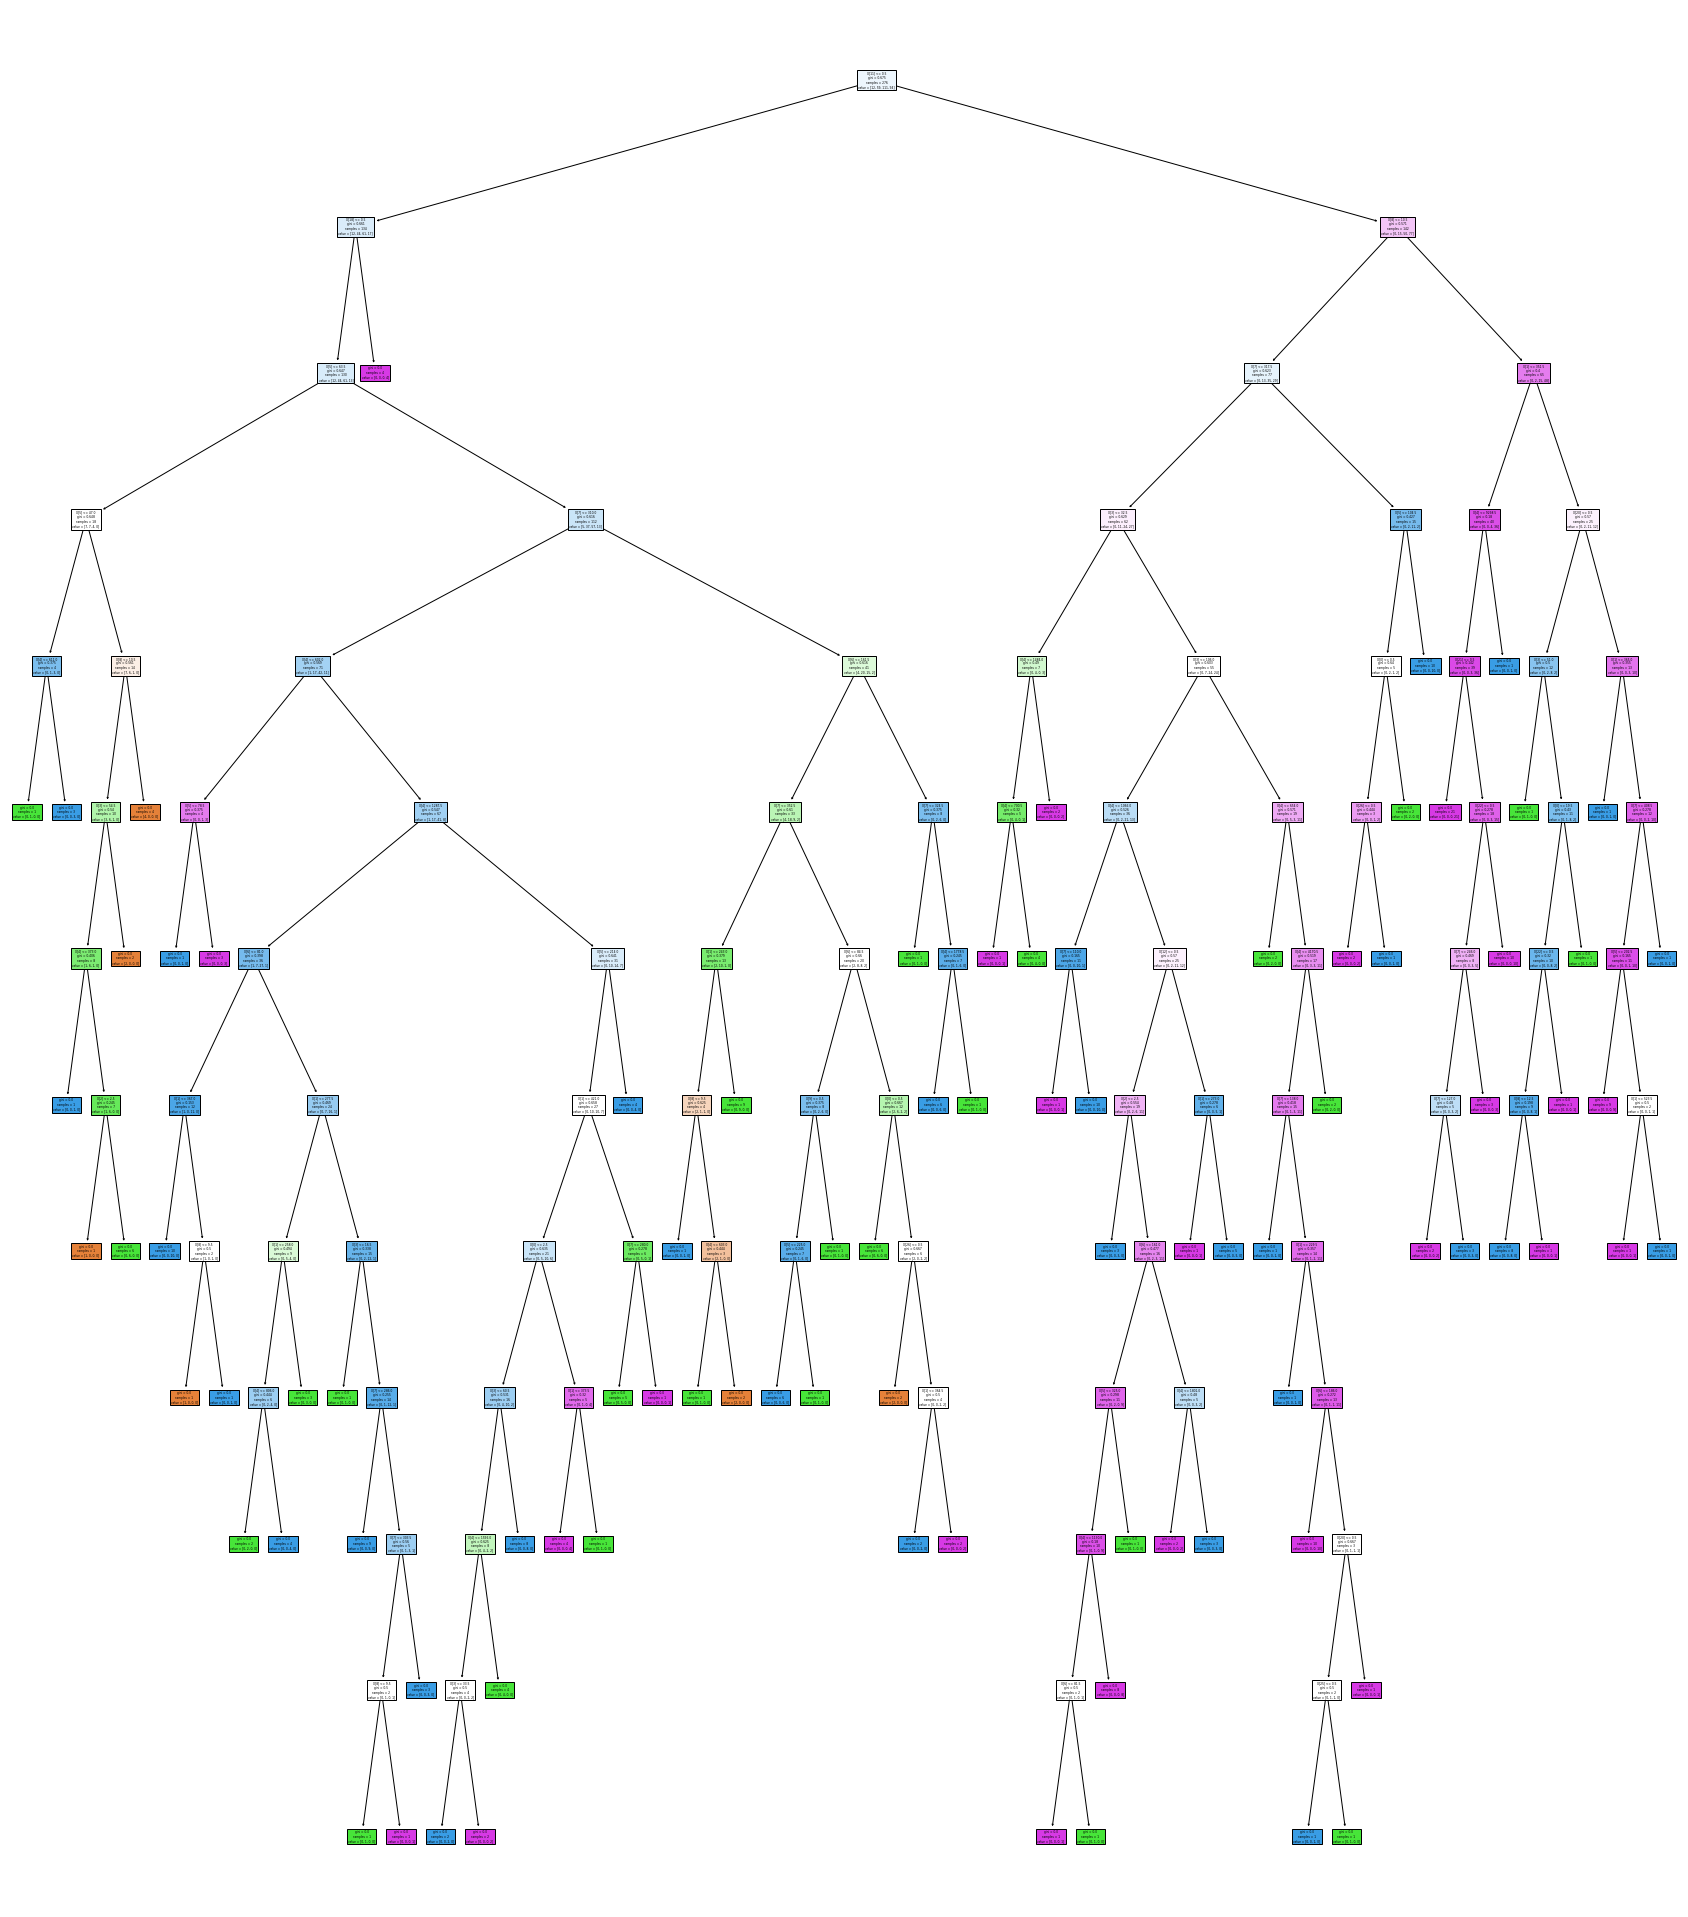

In [29]:
plt.figure(figsize=(30,35))
tree.plot_tree(clf,filled=True)

In [30]:
print(tree.export_text(clf))

|--- feature_11 <= 0.50
|   |--- feature_18 <= 0.50
|   |   |--- feature_5 <= 63.50
|   |   |   |--- feature_5 <= 47.00
|   |   |   |   |--- feature_4 <= 611.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_4 >  611.00
|   |   |   |   |   |--- class: 3
|   |   |   |--- feature_5 >  47.00
|   |   |   |   |--- feature_8 <= 10.50
|   |   |   |   |   |--- feature_3 <= 54.50
|   |   |   |   |   |   |--- feature_4 <= 373.00
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_4 >  373.00
|   |   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_3 >  54.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_8 >  10.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_5 >  63.50
|   |   |   |--- feature_7 <= 310.00
|   |   |   |   |--- feature_4 <= 602.00
|   |   | 

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        23

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

